                                        Elevvo.tech                                                   
                            Machine learning Internship Tasks                                
                                    Due Date: 25th August 2025                                                 

---

                                  Muhammad Usman Fakhar                                                               
                                Machine learning tracks                                                    
                                                                                          

---

In [551]:
2+2

4

In [552]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [553]:
SP_df= pd.read_csv(r"C:\Users\Dell\OneDrive - Higher Education Commission\Desktop\Evolvo Internship\Task # 01\StudentPerformanceFactors.csv")

In [554]:
SP_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [555]:
SP_df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [556]:
SP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [557]:
SP_df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [558]:
SP_df.shape

(6607, 20)

In [559]:
SP_df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [560]:
SP_df.dropna(inplace=True)
SP_df.shape

(6378, 20)

In [561]:
SP_df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [562]:
SP_df.shape

(6378, 20)

                                        Task # 01 Visualization                                                         

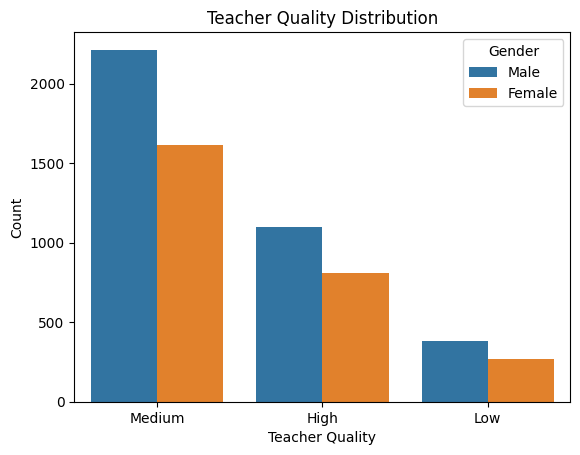

In [563]:
sns.countplot(x='Teacher_Quality', hue='Gender',data = SP_df)
plt.title('Teacher Quality Distribution')
plt.xlabel('Teacher Quality')
plt.ylabel('Count')
plt.show()

In [564]:
SP_df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

<Axes: >

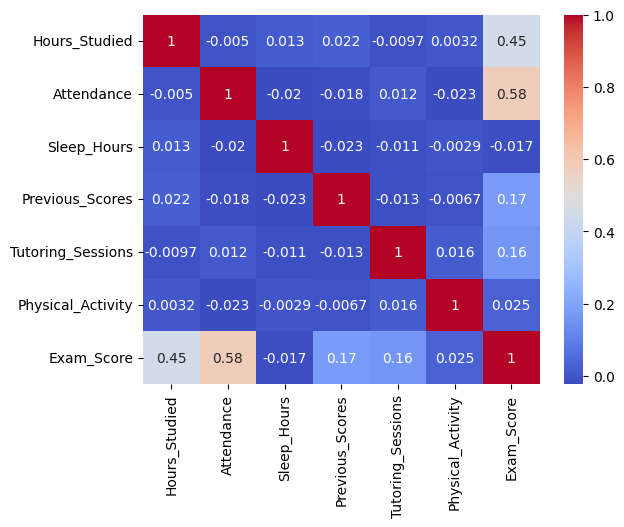

In [565]:
sns.heatmap(SP_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')


In [566]:
print(SP_df.select_dtypes(include='number').columns)

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

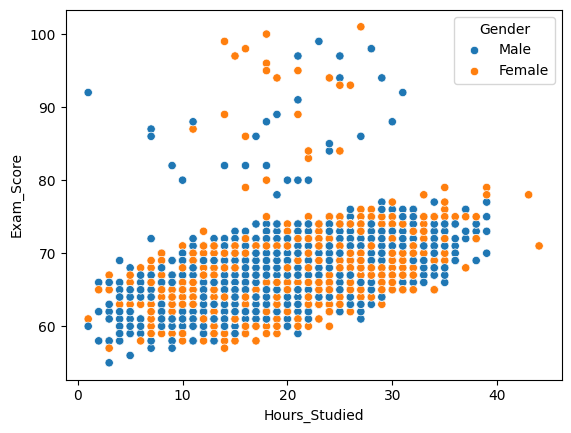

In [567]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score',hue='Gender' ,data=SP_df)

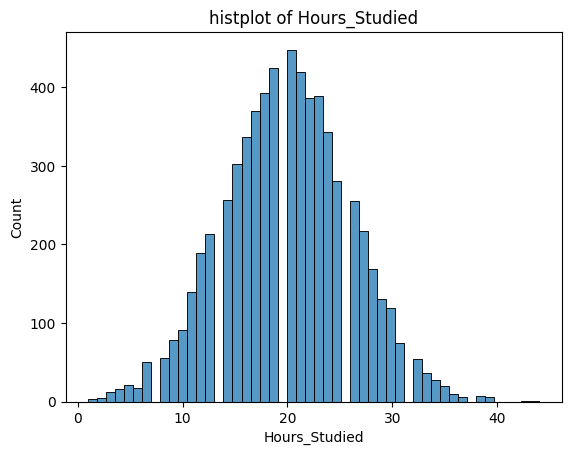

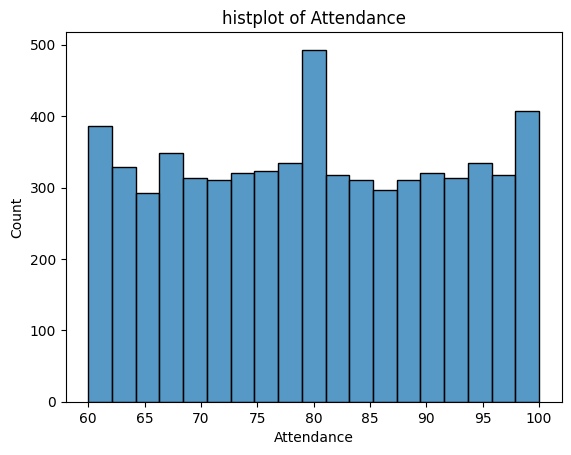

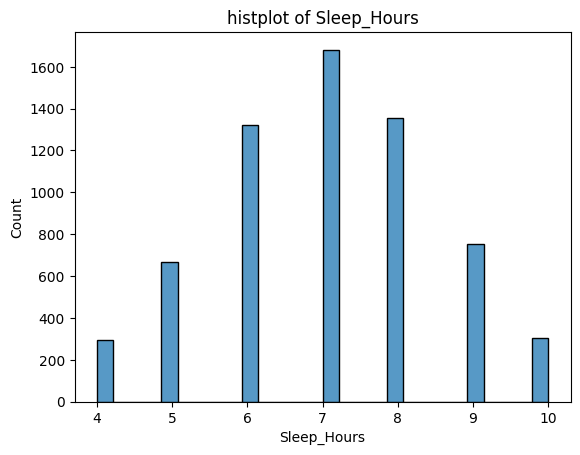

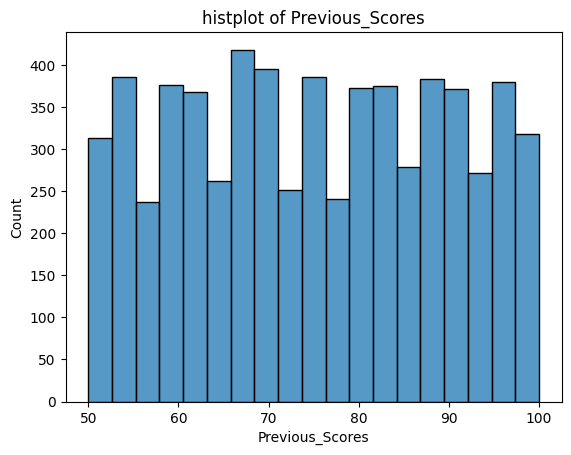

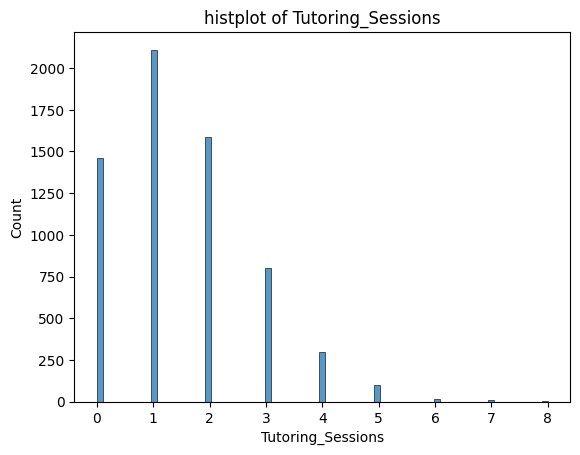

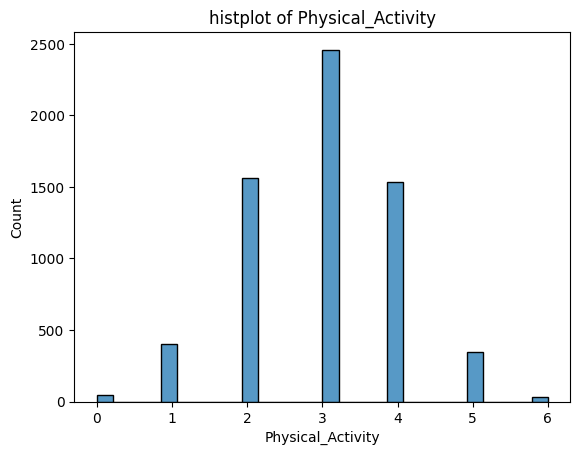

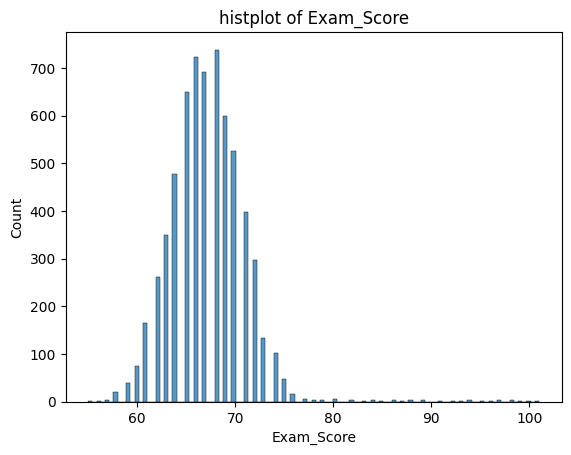

In [568]:
for col in SP_df.select_dtypes(include='number').columns:
    sns.histplot(x=SP_df[col])
    plt.title(f'histplot of {col}')
    plt.show()

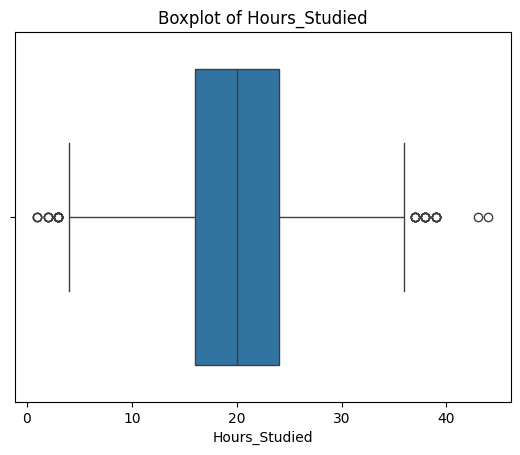

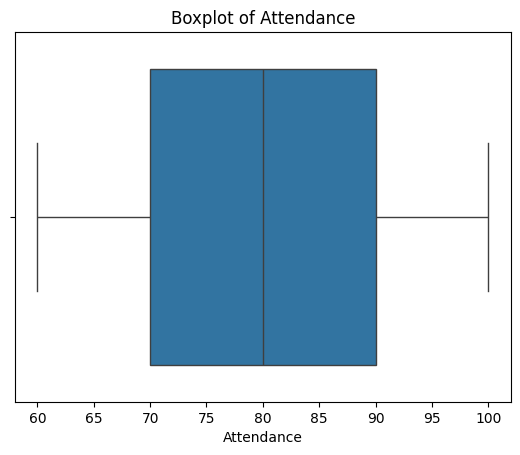

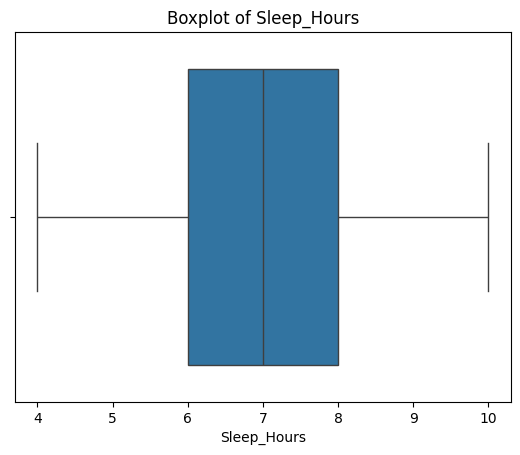

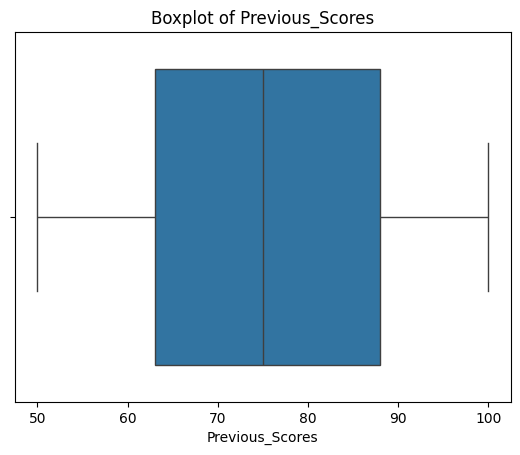

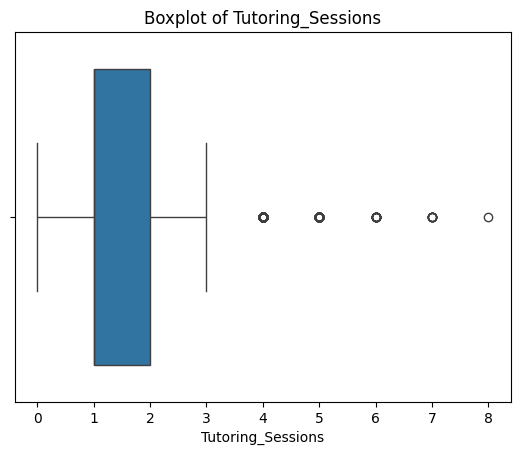

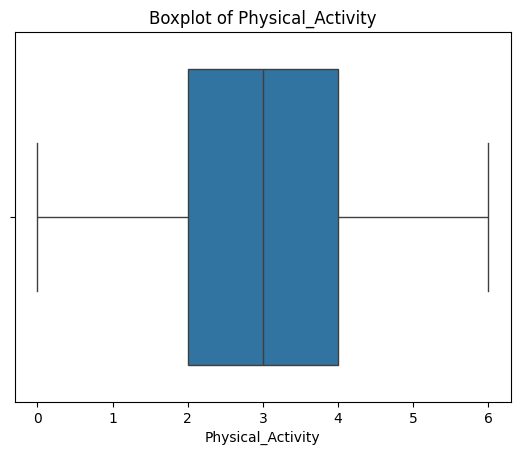

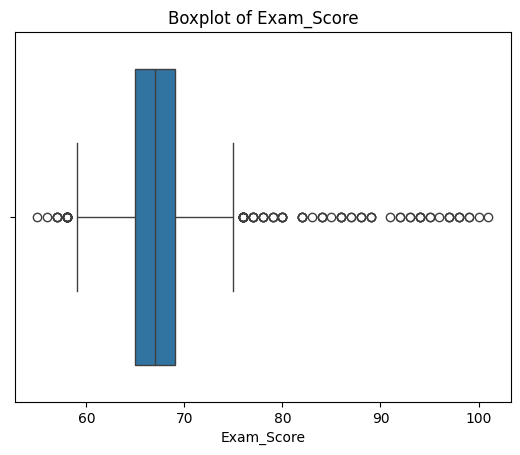

In [569]:
for col in SP_df.select_dtypes(include='number').columns:
    sns.boxplot(x=SP_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<Axes: xlabel='Exam_Score', ylabel='Gender'>

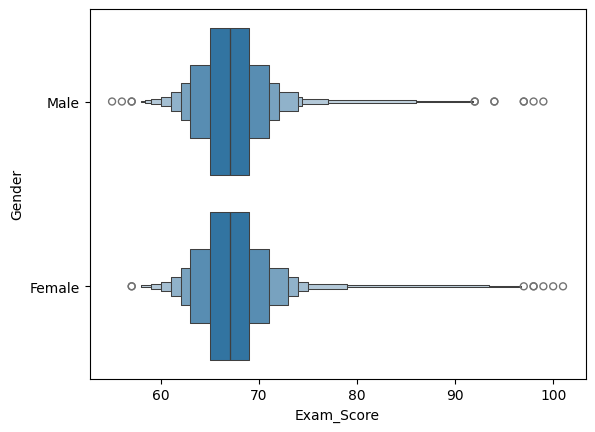

In [570]:
sns.boxenplot(x='Exam_Score',y='Gender',data=SP_df)

In [571]:
categorical_columns = SP_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(SP_df[column].unique())

['Low' 'Medium' 'High']
['High' 'Medium' 'Low']
['No' 'Yes']
['Low' 'Medium' 'High']
['Yes' 'No']
['Low' 'Medium' 'High']
['Medium' 'High' 'Low']
['Public' 'Private']
['Positive' 'Negative' 'Neutral']
['No' 'Yes']
['High School' 'College' 'Postgraduate']
['Near' 'Moderate' 'Far']
['Male' 'Female']


In [572]:
for column in categorical_columns:
    print("Column: ", SP_df[column].value_counts())

Column:  Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64
Column:  Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64
Column:  Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64
Column:  Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64
Column:  Internet_Access
Yes    5893
No      485
Name: count, dtype: int64
Column:  Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64
Column:  Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64
Column:  School_Type
Public     4434
Private    1944
Name: count, dtype: int64
Column:  Peer_Influence
Positive    2553
Neutral     2495
Negative    1330
Name: count, dtype: int64
Column:  Learning_Disabilities
No     5710
Yes     668
Name: count, dtype: int64
Column:  Parental_Education_Level
High School     3159
College         1939
Postgraduate  

In [574]:
from sklearn.preprocessing import LabelEncoder

# Ordinal columns: have a natural order (Low < Medium < High, etc.)
ordinal_columns = [
    'Parental_Involvement',      # Low < Medium < High
    'Access_to_Resources',       # Low < Medium < High
    'Motivation_Level',          # Low < Medium < High
    'Family_Income',             # Low < Medium < High
    'Teacher_Quality',           # Low < Medium < High
    'Parental_Education_Level',  # High School < College < Postgraduate
    'Distance_from_Home'         # Near < Moderate < Far
]

# Nominal columns: no natural order (categories are just names)
nominal_columns = [
    'Extracurricular_Activities',  # Yes, No
    'Internet_Access',             # Yes, No
    'School_Type',                 # Public, Private
    'Peer_Influence',              # Positive, Neutral, Negative
    'Learning_Disabilities',       # Yes, No
    'Gender'                       # Male, Female
]

df = pd.get_dummies(SP_df, columns=nominal_columns, drop_first=True)

# Create a LabelEncoder object
label_encoder = LabelEncoder()
for column in ordinal_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,3,1,2,67,False,True,True,False,True,False,True
1,19,64,1,2,8,59,1,2,2,2,4,0,1,61,False,True,True,False,False,False,False
2,24,98,2,2,7,91,2,2,2,2,4,2,2,74,True,True,True,True,False,False,True
3,29,89,1,2,8,98,2,1,2,2,4,1,1,71,True,True,True,False,False,False,True
4,19,92,2,2,6,65,2,3,2,0,4,0,2,70,True,True,True,True,False,False,False


In [575]:
df.shape

(6378, 21)

In [576]:
df = df[df['Exam_Score']<=100]
df.shape

(6377, 21)

In [577]:
z = np.abs((df - df.mean()) / df.std())
threshold = 3
df= df[(z < threshold).all(axis=1)]

In [578]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [579]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [580]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{model.__class__.__name__}:")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

LinearRegression:
MAE: 0.92
R-squared: 0.88


                                                            PolynomialRegression                                                            

In [581]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [582]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [583]:
X_train_poly.shape


(4641, 230)

In [584]:
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("PolynomialRegression")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")


PolynomialRegression
MAE: 0.27
R-squared: 0.99


In [585]:
y_train_pred = model.predict(X_train_poly)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("PolynomialRegression (Training Data):")
print(f"MAE: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

print("\nPolynomialRegression (Test Data):")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

PolynomialRegression (Training Data):
MAE: 0.27
R-squared: 0.99

PolynomialRegression (Test Data):
MAE: 0.27
R-squared: 0.99


---
---
---